In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint

import os
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
PATH = "../../data/concrete_data"
fname = os.path.join(PATH, 'Concrete_Data_Yeh.csv')
df = pd.read_csv(fname)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [3]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.duplicated().sum()

np.int64(25)

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [6]:
print(f'Size: {df.size}')
print(f'Types: \n{df.dtypes}')



Size: 9045
Types: 
cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object


In [7]:
cor_matrix = df.corr()
cor_matrix

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [8]:
X = df.drop('csMPa', axis=1)
y = df['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print(X_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X_test

     cement   slag  flyash  water  superplasticizer  coarseaggregate  \
79    531.3    0.0     0.0  141.8              28.2            852.1   
29    475.0    0.0     0.0  228.0               0.0            932.0   
304   277.1    0.0    97.4  160.6              11.8            973.9   
531   436.0    0.0     0.0  218.0               0.0            838.4   
676   166.8  250.2     0.0  203.5               0.0            975.6   
..      ...    ...     ...    ...               ...              ...   
115   337.9  189.0     0.0  174.9               9.5            944.7   
294   168.9   42.2   124.3  158.3              10.8           1080.8   
885   153.0  145.0   113.0  178.0               8.0            867.0   
459   165.0  128.5   132.1  175.1               8.1           1005.8   
110   286.3  200.9     0.0  144.7              11.2           1004.6   

     fineaggregate  age  
79           893.7    3  
29           594.0    7  
304          875.6    3  
531          719.7   28  
676  

array([[-1.20803312,  0.84419242, -0.87586539, ...,  0.35077254,
         0.60318789, -0.27784404],
       [-1.49780416,  1.2998139 , -0.87586539, ..., -0.18648699,
         0.32991562, -0.27784404],
       [-1.20514503,  0.34789046, -0.87586539, ..., -1.0952971 ,
         2.09814796,  0.71712506],
       ...,
       [-0.00947847,  0.29907387, -0.49488869, ...,  1.15342534,
         0.11228703,  0.87760394],
       [-0.61982678,  0.30256077, -0.49488869, ...,  1.20909319,
         0.14938281, -0.67904126],
       [ 0.94166369, -0.83765521, -0.87586539, ...,  0.39996739,
        -0.13625472, -0.67904126]], shape=(201, 8))

1. Випадковий ліс   

In [9]:
rf_reg = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


In [10]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

MSE: 27.61767342541057
MAE: 3.499888001658374
R2: 0.90742417282202


2. Градіентний бустінг

In [11]:
gb_reg = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)



In [12]:
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("MSE:", gb_mse)
print("MAE:", gb_mae)
print("R2:", gb_r2)

MSE: 31.403643872900282
MAE: 4.128914301303752
R2: 0.8947334099018797


3. Лінійна регресія

In [13]:
lr_reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)

In [14]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("MSE:", lr_mse)
print("MAE:", lr_mae)
print("R2:", lr_r2)

MSE: 125.2456480505019
MAE: 8.895256221464194
R2: 0.5801703029028777


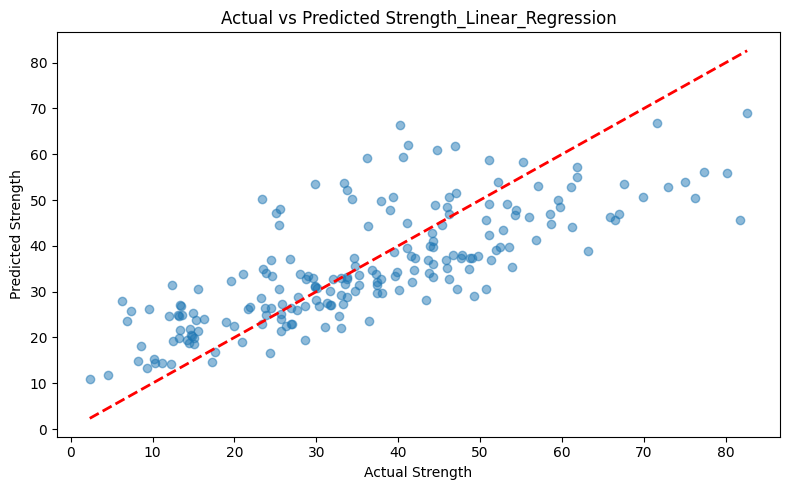

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Strength_Linear_Regression")
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')

plt.tight_layout()
plt.show()

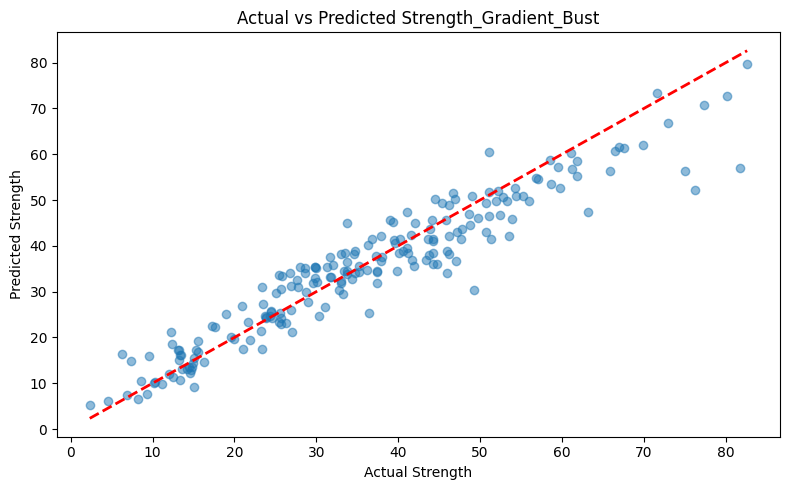

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Strength_Gradient_Bust")
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')

plt.tight_layout()
plt.show()

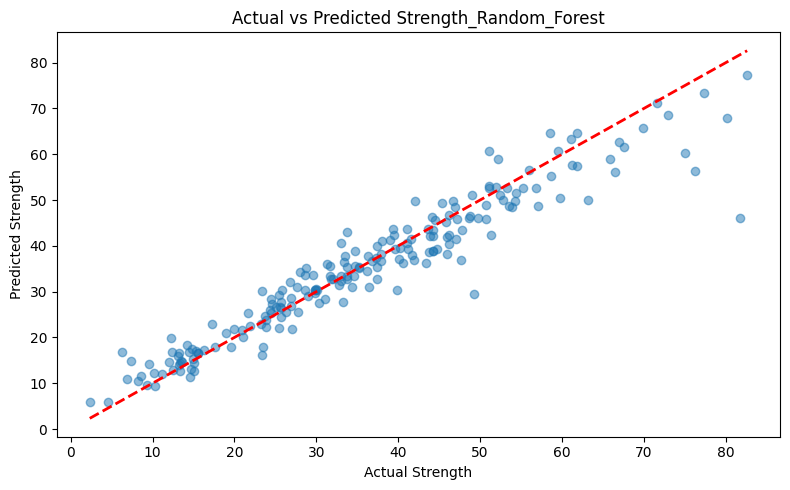

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Strength_Random_Forest")
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')

plt.tight_layout()
plt.show()

In [18]:
param_rf = {
    'n_estimators': [50, 100, 200], 
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf_regs_gs = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator=rf_regs_gs, param_grid=param_rf, cv=3)
rf_search.fit(X_train, y_train)
best_rf_params = rf_search.best_params_
best_rf_params

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 200}

In [19]:
rf_optimal = RandomForestRegressor(**best_rf_params, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)

# Розрахунки даних з підібраними параметрами
rf_mse = mean_squared_error(y_test, y_pred_rf_optimal)
rf_mae = mean_absolute_error(y_test, y_pred_rf_optimal)
rf_r2 = r2_score(y_test, y_pred_rf_optimal)

print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

# Без підібраних параметрів:
# MSE: 27.61767342541057
# MAE: 3.499888001658374
# R2: 0.90742417282202

MSE: 27.09470994111042
MAE: 3.5370868005212066
R2: 0.9091771726637237


Задача 1: Застосувати різні методи масштабування і нормалізації даних. Проаналізувати результати

In [20]:
# Задача 1. Масштабування даних 
# Приклад даних: зріст в см. і вага (в кг)
data = np.array([[150, 70], [160, 80],[170, 90],[180, 100] ])

# Масштабування за допомогою MinMaxScaller
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data)

In [21]:
# Масштабування за допомогою StandardScaller
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

In [22]:
# Масштабування за допомогою RobustScaller
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)

In [23]:
print("Original data:")
print(data)
print("\nScaled Data (MinMaxScaler):")
print(min_max_scaled_data)
print("\nScaled Data (StandardScaler):")
print(standard_scaled_data)

print("\nScaled Data (RobustScaler):")
print(robust_scaled_data)



Original data:
[[150  70]
 [160  80]
 [170  90]
 [180 100]]

Scaled Data (MinMaxScaler):
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]

Scaled Data (StandardScaler):
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

Scaled Data (RobustScaler):
[[-1.         -1.        ]
 [-0.33333333 -0.33333333]
 [ 0.33333333  0.33333333]
 [ 1.          1.        ]]


In [24]:
normalize(data)

array([[0.90618314, 0.42288547],
       [0.89442719, 0.4472136 ],
       [0.88378792, 0.46788772],
       [0.87415728, 0.48564293]])

Завдання 2. Завантажити датасет heart.csv провести аналіз даних, побудувати моделі класифікації, вивести результати, зробити висновки

Датасет: https://drive.google.com/file/d/1o3jIdtDyGpufREgFVv1u9fraVx2vDnUy/view

In [25]:
PATH = Path("../../data/heart")
fname = PATH / 'heart.csv'
if fname.exists():
    df = pd.read_csv(fname)
    print("✅ Файл успішно зчитано:")
    display(df.head())
else:
    print(f"❌ Файл не знайдено: {fname.resolve()}")


✅ Файл успішно зчитано:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


1. age - вік пацієнта (у роках)

2. anaemia - анемія (1 - є, 0- нмає). Анемія знижує кількість червоних кров'яних клітин, що може впливати на кисневе забезпечення органів.

3. creatine_phosphokinase - рівень ферменту креатинфосфокінази в крові ( в міжнародних одиницях на літр, U/L). Високі рівні можуть свідчити про пошкодження серцевого м'яза

4.  diabetes - наявність діабету (0-немаєб 1-є)

5. ejection_fraction - фракція викиду ( у відсотках, %). Визначає, який відсоток крові викидається з серця при кожному скорочені. Нижчі значення вказують на серцеву недостатність.

6. high_blood_pressure - високий артеріальний тиск (1-є, 0- немає)

7. platelets кількість тромбоцитів у крові (в кількості на мікролітр крові, тобто kiloplatelets/mL). Тромбоцити відіграють важливу роль у згортанні крові

8. serum_creatine - рівень креатиніну в сироватці крові ( в міліграмах на літр, mg/L). Високий рівень може вказувати на порушення функції нирок

9. serum_sodium - рівень натрію в сироватці крові (в мілімолях на літр, mEq/L). Дисбаланс може бути пов'язаний із серцевою недостатністю

10. sex - стать (1-чоловік, 0- жінка)
11. smiking - паління (1-палить, 0-не палить)

12. time - час спостереження (у днях). Наприклад, тривалість протяком якої пацієнта спостерігали в рамках дослідження.

13. DEATH_EVENT - чи стався летальний випадок під час спостереження (1- так, 0-ні). Це цільова змінна (target), яку часто використовують для прогнозування

In [26]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [27]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [28]:
df.duplicated().sum()

np.int64(3680)

In [29]:
df.drop_duplicates(inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [30]:
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


<Axes: >

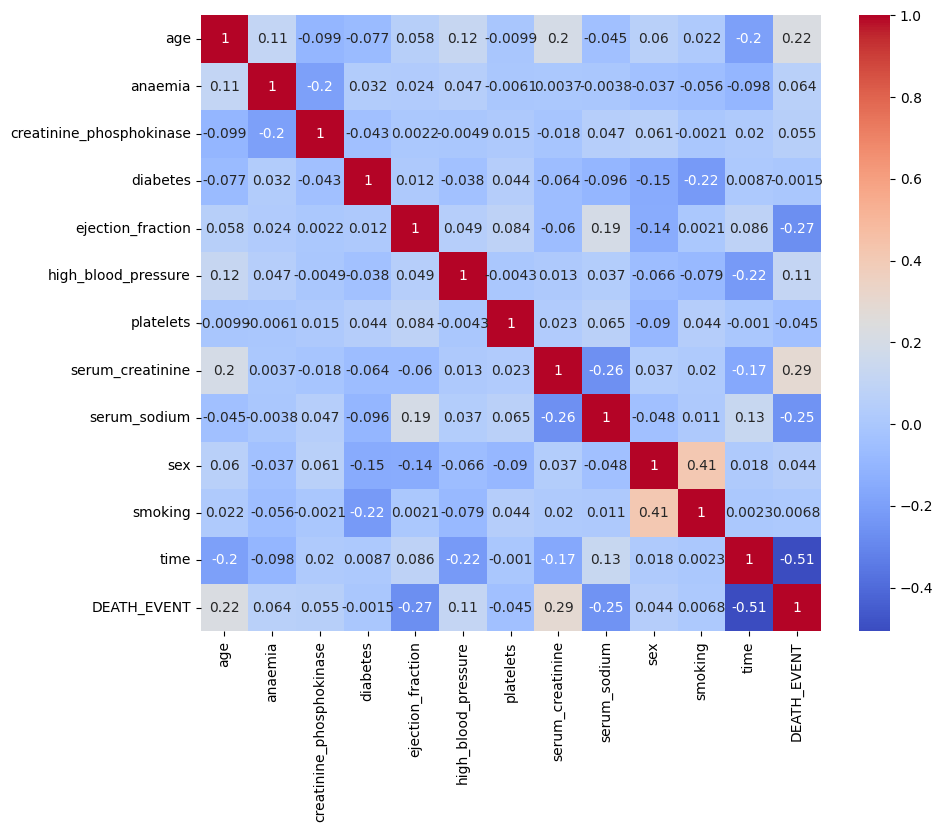

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')

In [32]:
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.290229
age                         0.224602
high_blood_pressure         0.113721
anaemia                     0.063510
creatinine_phosphokinase    0.055221
sex                         0.044045
smoking                     0.006774
diabetes                   -0.001485
platelets                  -0.044523
serum_sodium               -0.250990
ejection_fraction          -0.271767
time                       -0.507374
Name: DEATH_EVENT, dtype: float64

In [33]:
# Поділяємо ознаки і цільову функцію
X = df.drop("DEATH_EVENT", axis=1)
y= df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабуємо ознаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Будуємо модель RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions =rf_model.predict(X_test)

# Оцінка моделі RandomForest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264



In [34]:
# Побудова моделі Логістичної Регресії
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


lr_predictions = lr_model.predict(X_test)

# Оцінка моделі логістичної регресії
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.8409090909090909
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.70      0.70      0.70        70

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



In [35]:
# Побудова моделі Градієнтного Бустінгу
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Oцінка моделі Градієнтного Бустінгу
print("Gradient Buster Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

Gradient Buster Accuracy: 0.9431818181818182
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       194
           1       0.89      0.90      0.89        70

    accuracy                           0.94       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.94      0.94      0.94       264



In [36]:
# Вивід справжніх та прогнозованих значень для 10 пацієнтів
results_df=pd.DataFrame({
    'True Values': y_test,
    'Predictions' : rf_predictions
})

print("\nСправжні та прогнозовані значення  для 10 пацієнтів:")
results_df.head(10)


Справжні та прогнозовані значення  для 10 пацієнтів:


,True Values,Predictions
854,0,0
876,0,0
758,0,0
50,0,0
3460,0,0
596,0,0
679,1,1
1236,0,0
83,0,0
619,1,1


$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

Висосока точність означає, що ваша модель рідко робить помилки, коли прогнозує позитивний клас.

Повнота. Високе значення означає, що модель вміє виявляти більшість позитивних випадків, але може допускати помилки у прогнозах негативних випадків.

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

F1-Score - це гармонійне середнє між precision та recall. Воно забезпечує єдиний показник, який враховує як точність, так і повнота. Високий F1-Score вказує на те, що модель має хорошу продуктивність в обох аспектах.


$$\text{F1-Score} = \frac{\text{Precision} x \text{Recall}}{\text{Precision} + \text{Recall}}$$





In [37]:
# Застосування GridSearchCV для підбору параметрів
rf_model = RandomForestClassifier(random_state=42)

# 1. Grid Search для оптимізації
param_grid = {
    'n_estimators':[10, 50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20, 30], # maximum depth of a tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] # minimal number of samples, present in a leaf
    
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search: ", grid_search.best_params_)


# Оцінка моделі з найкращими параметрами
best_rf_model = grid_search.best_estimator_
grid_predictions = best_rf_model.predict(X_test)

# Оцінка точності
print("Grid Search Random Forest Accuracy: ", accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))



Best parameters from Grid Search:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search Random Forest Accuracy:  0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264



In [38]:
# 2. Randomized Search для оптимізації гіперпараметрів
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Найкращі параметри з Randomized Search
print("Best paramters from Randomized Search:", random_search.best_params_)

# Оцінка моделі за найкращими параметрами
best_rf_random_model = random_search.best_estimator_
random_predictions = best_rf_random_model.predict(X_test)

# Оцінка точності
print("Randomized Search Random Forest Accuracy:", accuracy_score(y_test, random_predictions))
print(classification_report(y_test, random_predictions))

Best paramters from Randomized Search: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 98}
Randomized Search Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264

